### Using Random Forest to predict rainfall

### What is our Objective ?
* To reliably predict next day's rainfall using possible derminants 

### Getting to know ourWeatherAus dataset! 

WeatherAus dataset contains about 10 years of daily weather observations from many locations across Australia it has the following features:

* Date - The date of observation
* Location - Location of the weather station
* MinTemp - Minimum temperature of the observed day in degree celsius
* MaxTemp - Maximum temperature of the observed day in degree celsius
* Rainfall - The amount of rainfall recorded for the day in mm
* Evaporation - Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine - The number of hours of bright sunshine in the day.
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am - Direction of the wind at 9am
* WindDir3pm - Direction of the wind at 3pm
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am - Humidity (percent) at 9am
* Humidity3pm - Humidity (percent) at 3pm
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 
* Cloud3pm - Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many 
* Temp9am - Temperature (degrees C) at 9am
* Temp3pm - Temperature (degrees C) at 3pm
* RainToday -  if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow - The amount of next day rain in mm

### Approach
* In this example, we will be balancing an imbalanced data set using random oversampling, undersampling and SMOTE.
* Then we'll label encode categorical features.
* Use various imputation methods to handle missing values in the dataset.
* Split the preprocessed dataset and train on it using RandomForest API from mlpack.
* Finally we'll use various metrics such as Accuracy, F1-Score, ROC AUC to judge the performance of our model.

#### NOTE: This example has 4 parts implementing the above approach using raw imbalanced data, undersampled, oversampled & using SMOTE 

In [10]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack

In [2]:
%matplotlib inline
sns.set(color_codes=True)

### Load the data

In [9]:
# Load Rain in Australia (weatherAUS) dataset.
weatherData = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

### Explore the data

In [8]:
# Examine first 5 samples from the dataset.
weatherData.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Examine the shape of the dataframe.
print(f"# of rows: {weatherData.shape[0]}")
print(f"# of cols: {weatherData.shape[1]}")

# of rows: 145460
# of cols: 23


In [11]:
# Concise summary if all the features in the dataframe.
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Exploring Categorical and Numeric features

In [7]:
print("CATEGORIAL FEATURES:")
for col in weatherData.columns:
    if weatherData[col].dtype == "object":
        print(col)

CATEGORIAL FEATURES:
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [8]:
print("NUMERIC FEATURES:")
for col in weatherData.columns:
    if weatherData[col].dtype == "float":
        print(col)

NUMERIC FEATURES:
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


### Part 1 - Modelling using Imbalanced Dataset

### Visualize the Missing Values

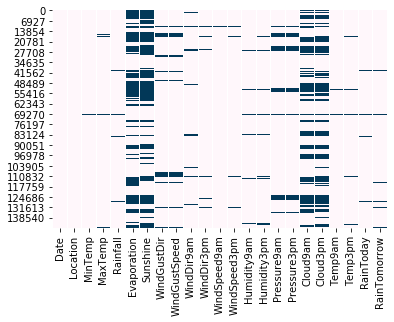

In [9]:
sns.heatmap(weatherData.isnull(), cbar=False, cmap="PuBu")
plt.show()

The above visualization shows that high number of values are missing in: Sunshine, Evaporation, Cloud9am and Cloud3pm

In [18]:
## Check the percentage of missing values in each feature befor imputation
(weatherData.isnull().sum() / len(weatherData)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

We observe that atmost some features have 50% missing values. So instead of discarding them, we will impute them with proper imputation method

In [14]:
def Imputer(data: pd.DataFrame, kind: str="mean") -> pd.DataFrame:
    """
    Returns the imputed dataset based on the imputation policy
    
        Parameters:
            data (DataFrame): Pandas dataframe on which imputation must be done
            kind (str): imputation policy
    """
    df = data.copy()
    for feature in data.columns:
        if df[feature].dtype == "float":
            if kind == "mean":
                df[feature] = df[feature].fillna(df[feature].mean())
            elif kind == "median":
                df[feature] = df[feature].fillna(df[feature].median())
            elif kind == "mode":
                df[feature] = df[feature].fillna(df[feature].mode()[0])
        elif df[feature].dtype == "object":
            df[feature] = df[feature].fillna(df[feature].mode()[0])
    return df

In [15]:
#weatherDf = weatherDf.apply(lambda x:`a x.fillna(x.median()) if x.dtype == np.float64 else x.fillna(x.value_counts().index[0]))

In [16]:
weatherImp = Imputer(weatherData)

In [19]:
## Check the percentage of missing values in each feature post imputation
(weatherImp.isnull().sum() / len(weatherImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

### Visualize data distribution 

Next, we will check whether the dataset is imbalanced or balanced. If the dataset is imbalanced, we need to undersample majority or oversample minority to balance it.

In [15]:
weatherData.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

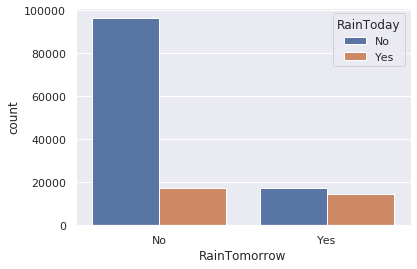

In [23]:
# Visualize the distibution of target classes.
sns.countplot(x="RainTomorrow", hue="RainToday", data=weatherImp)
plt.show()

From the above visualization, we can observe that the presence of "No" and "Yes" are in ratio 78:22, so there is a huge class imbalance. For the first part we would not be handling the class imbalance. In order to see how our model performs on the raw imbalanced data

### EDA

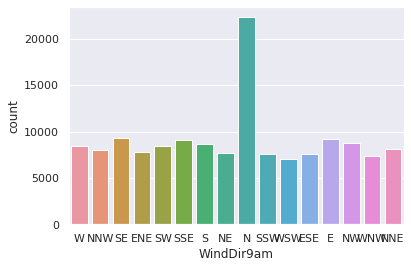

In [20]:
# Visualize the direction of wind at 9 am.
sns.countplot(x="WindDir9am", data=weatherImp)
plt.show()

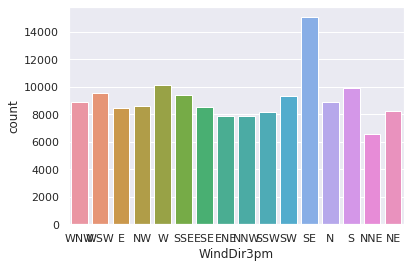

In [21]:
# Visualize the direction of wind at 3 pm
sns.countplot(x="WindDir3pm", data=weatherImp)
plt.show()

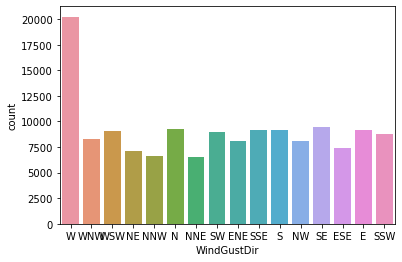

In [19]:
sns.countplot(x="WindGustDir", data=weatherImp)
plt.show()

In [20]:
weatherImp['Year']=weatherImp.Date.dt.year

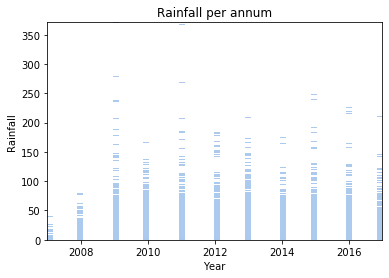

In [21]:
sns.histplot(x="Year", y="Rainfall", data=weatherImp)
plt.title("Rainfall per annum")
plt.show()

In [22]:
weatherImp = weatherImp.drop(["Date", "Year"], axis=1)

### Visualize Correlation

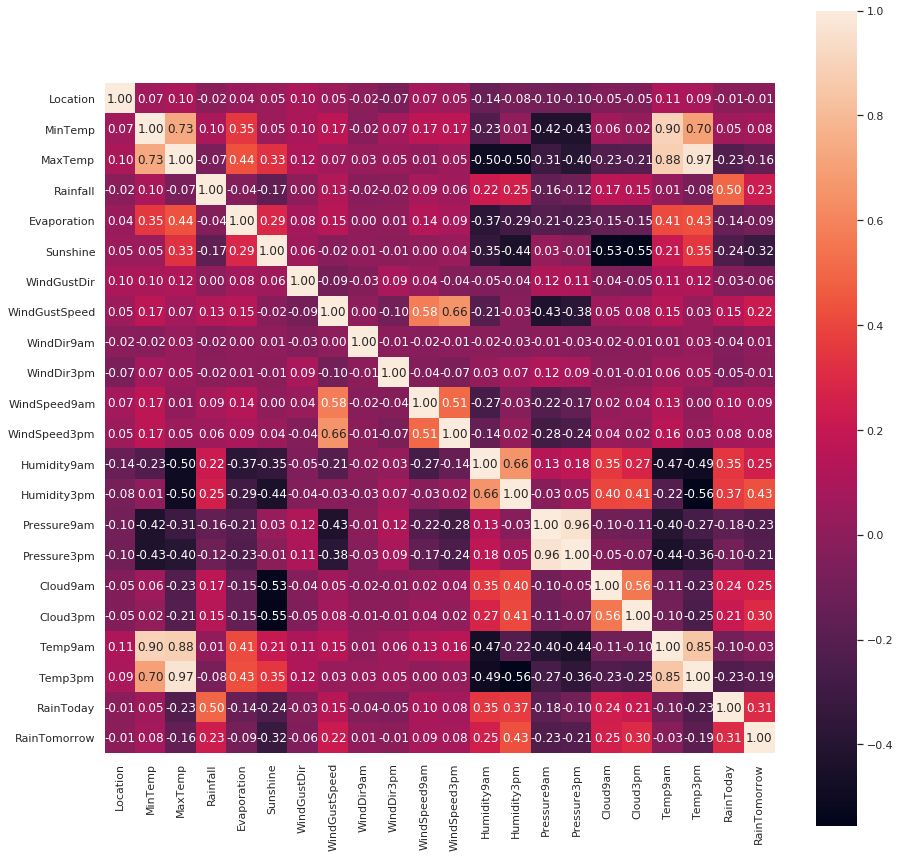

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(weatherImp.corr(), square=True, 
            annot=True, fmt=".2f")
plt.show()

As we can observe from the above heatmap, there is high correlation between the following features:
* MinTenp & MaxTemp
* MinTemp & Temp9am
* MinTemp & Temp3pm
* MaxTemp & Temp9am
* MaxTemp & Temp3pm
* Temp3pm & Temp9am
* Pressure9am and Pressure3pm
* Evaporation & MaxTemp

In [27]:
def LabelEncoder(data):
    """
    Label encodes all categorical features in the dataframe
        
        Parameter:
            data (DataFrame): Pandas dataframe on which encoding must be performed
            
        Returns:
            
    """
    for col in data.columns:
        if data[col].dtype == "object":
            uniqs = list(data[col].unique())
            data[col] = data[col].apply(lambda x: uniqs.index(x))
    return data

In [28]:
# Label encode all the categorical features.
weatherEnc = LabelEncoder(weatherImp)

In [26]:
# Features of interest.
featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]

In [27]:
# Split the data into features and targets.
features=weatherEnc[featureNames]
target=weatherEnc["RainTomorrow"]

### Train Test Split

The dataset has to be split into training and test set. Here the dataset has 145460 observations and the test ratio is taken as 25% of the total observations. This indicates that the test set should have 25% * 145460 = 36365 observations and training set should have 109095 observations respectively.

In [28]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [6]:
def StandardScaler(data):
    for col in range(data.shape[1]):
        data[:, col] = (data[:, col] - data[:,col].mean()) / (data[:,col].std())
    return data


def plot_rocAUC(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [30]:
# Normalize Features.
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

### Training the Random Forest model

To create the model we'll be using `RandomForest()` API from mlpack.

In [ ]:
# Create and train Random Forest model with 100 trees.
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [32]:
rf = output["output_model"]

### Making Predictions on Test set

In [33]:
# Predict the values for test data using previously trained model as input.
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [35]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

### Model Evaluation

In [28]:
from sklearn.metrics import *

Accuracy: 0.8581053210504606
ROC AUC: 0.7295961597573883
Cohen's Kappa: 0.5236258123068529
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28479
           1       0.76      0.50      0.61      7886

    accuracy                           0.86     36365
   macro avg       0.82      0.73      0.76     36365
weighted avg       0.85      0.86      0.85     36365



/home/art3mis/anaconda3/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:564: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w_mat = np.ones([n_classes, n_classes], dtype=np.int)


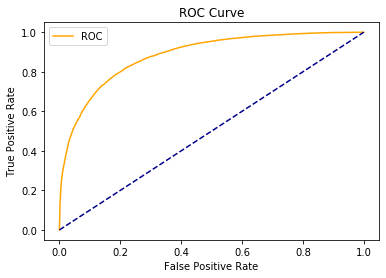

In [38]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Part 2 - Modelling using Random Oversampling

In [8]:
def Resample(data, replace, n_samples, random_state = 123):
    np.random.seed(random_state)
    indices = data.index
    random_sampled_indices = np.random.choice(indices,
                                              size=n_samples,
                                              replace=replace)
    return data.loc[random_sampled_indices]

In [47]:
negClass = weatherData[weatherData.RainTomorrow == "No"]
posClass = weatherData[weatherData.RainTomorrow == "Yes"]
posOverSampled = Resample(posClass, replace=True, n_samples=len(negClass))
overSampled = pd.concat([negClass, posOverSampled])

In [69]:
overSampled.shape

(142193, 23)

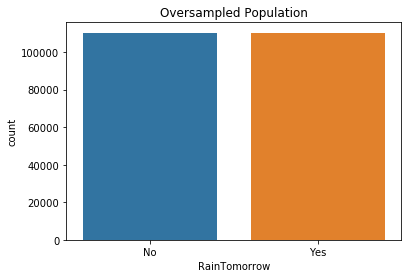

In [48]:
ax = sns.countplot(x="RainTomorrow", data=overSampled)
ax.set_title("Oversampled Population")
plt.show()

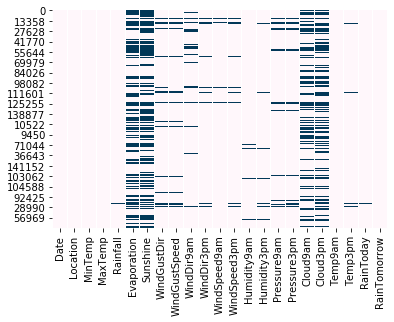

In [49]:
sns.heatmap(overSampled.isnull(), cbar=False, cmap="PuBu")
plt.show()

In [52]:
(overSampled.isnull().sum() / len(overSampled)) * 100

Date              0.000000
Location          0.000000
MinTemp           0.490409
MaxTemp           0.213478
Rainfall          1.415932
Evaporation      43.244407
Sunshine         47.513960
WindGustDir       7.021194
WindGustSpeed     6.959099
WindDir9am        6.675369
WindDir3pm        2.918888
WindSpeed9am      0.999855
WindSpeed3pm      1.972969
Humidity9am       1.437235
Humidity3pm       2.733511
Pressure9am       9.848073
Pressure3pm       9.856231
Cloud9am         36.866366
Cloud3pm         38.803981
Temp9am           0.749211
Temp3pm           2.065883
RainToday         1.415932
RainTomorrow      0.000000
dtype: float64

In [50]:
overSampledImp = Imputer(overSampled)

In [51]:
(overSampledImp.isnull().sum() / len(overSampledImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [53]:
overSampledEnc = LabelEncoder(overSampledImp)

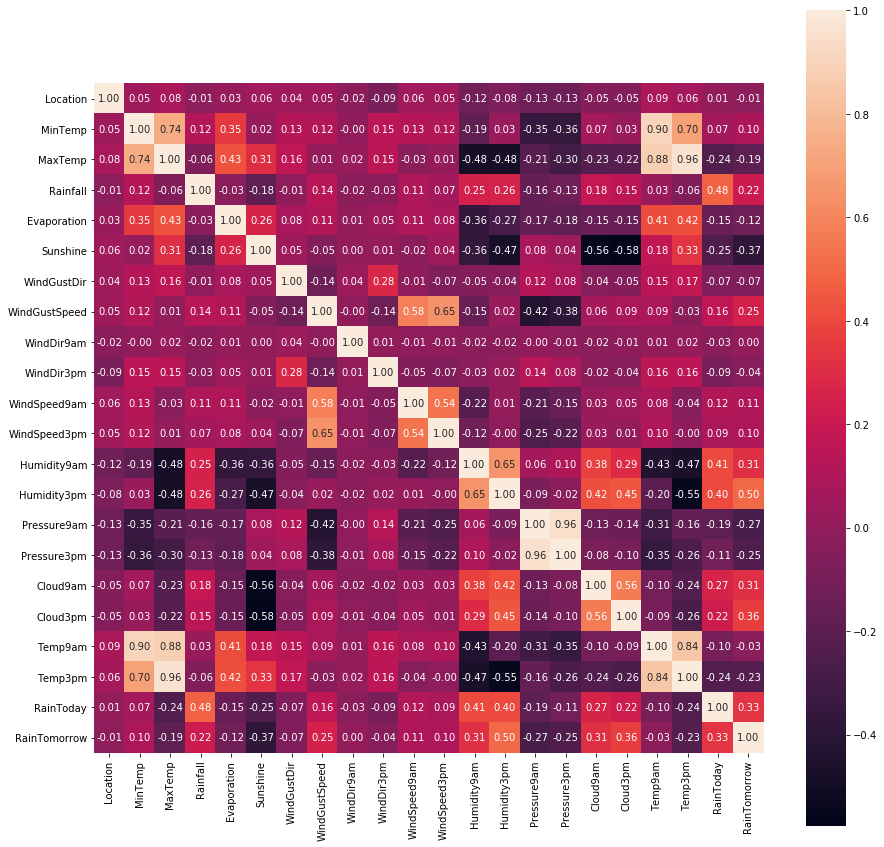

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(overSampledEnc.corr(), square=True, annot=True, fmt=".2f")
plt.show()

In [55]:
featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]

features = overSampledEnc[featureNames]
target = overSampledEnc["RainTomorrow"]

In [56]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [57]:
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [58]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [59]:
rf = output["output_model"]

In [60]:
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [61]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.9431270169331738
ROC AUC: 0.942930918138075
Cohen's Kappa: 0.8862038876550205
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     27375
           1       0.92      0.97      0.94     27783

    accuracy                           0.94     55158
   macro avg       0.94      0.94      0.94     55158
weighted avg       0.94      0.94      0.94     55158



/home/art3mis/anaconda3/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:564: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w_mat = np.ones([n_classes, n_classes], dtype=np.int)


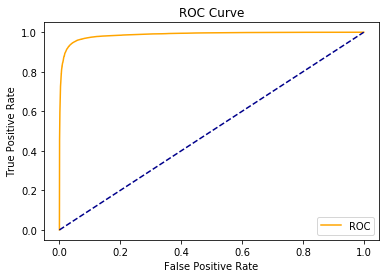

In [62]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Modelling using Synthetic Minority Over Sampling Technique

In [9]:
smoteData = weatherData.copy()

In [10]:
(smoteData.isnull().sum() / len(smoteData)) * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [11]:
smoteImp = Imputer(smoteData)

In [12]:
(smoteImp.isnull().sum() / len(smoteImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [13]:
smoteEnc = LabelEncoder(smoteImp)

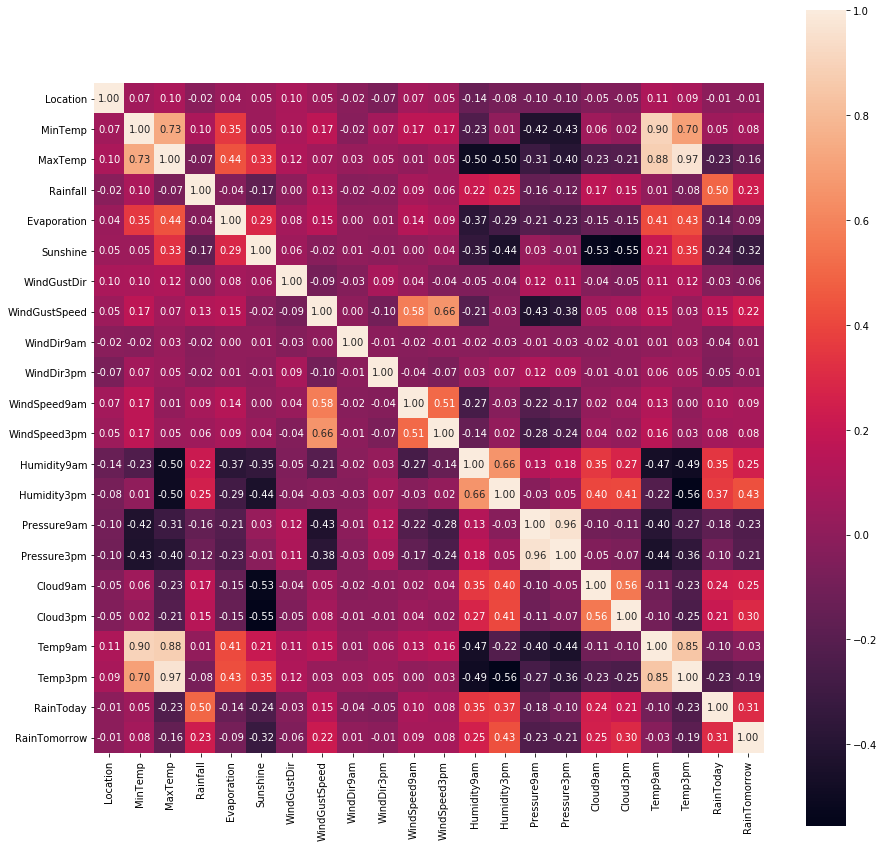

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(smoteEnc.corr(), square=True, annot=True, fmt=".2f")
plt.show()

In [17]:
featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday", "RainTomorrow"]

features = smoteEnc[featureNames]

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
os = SMOTE()
features, targets = os.fit_resample(features.iloc[:, :-1], features.iloc[:,-1])

In [21]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = targets.iloc[train_idxs[:split]].values
ytrain = targets.iloc[train_idxs[split:]].values

In [22]:
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [23]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [24]:
rf = output["output_model"]

In [25]:
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [26]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.6516877674279375
ROC AUC: 0.6503260936182671
Cohen's Kappa: 0.301469658808056
              precision    recall  f1-score   support

           0       0.95      0.32      0.48     28279
           1       0.59      0.98      0.74     28512

    accuracy                           0.65     56791
   macro avg       0.77      0.65      0.61     56791
weighted avg       0.77      0.65      0.61     56791



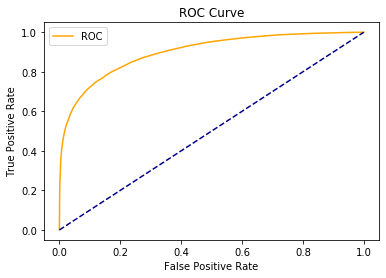

In [29]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)

### Modelling using Random Undersampling

In [76]:
negClass = weatherData[weatherData.RainTomorrow == "No"]
posClass = weatherData[weatherData.RainTomorrow == "Yes"]
negUnderSampled = Resample(negClass, replace=False, n_samples=len(posClass))
underSampled = pd.concat([negUnderSampled, posClass])

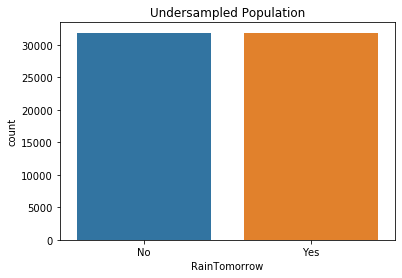

In [77]:
ax = sns.countplot(x="RainTomorrow", data=underSampled)
ax.set_title("Undersampled Population")
plt.show()

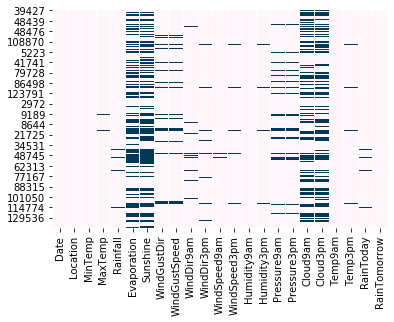

In [78]:
sns.heatmap(underSampled.isnull(), cbar=False, cmap="PuBu")
plt.show()

In [79]:
(underSampled.isnull().sum() / len(underSampled)) * 100

Date              0.000000
Location          0.000000
MinTemp           0.481538
MaxTemp           0.208614
Rainfall          1.411676
Evaporation      43.275716
Sunshine         47.521724
WindGustDir       7.048969
WindGustSpeed     6.994071
WindDir9am        6.584685
WindDir3pm        2.909621
WindSpeed9am      1.028955
WindSpeed3pm      1.995169
Humidity9am       1.341092
Humidity3pm       2.653951
Pressure9am       9.795464
Pressure3pm       9.809581
Cloud9am         36.901214
Cloud3pm         38.843053
Temp9am           0.723092
Temp3pm           2.042225
RainToday         1.411676
RainTomorrow      0.000000
dtype: float64

In [80]:
underSampledImp = Imputer(underSampled)

In [81]:
(underSampledImp.isnull().sum() / len(underSampledImp)) * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [82]:
underSampledEnc = LabelEncoder(underSampledImp)

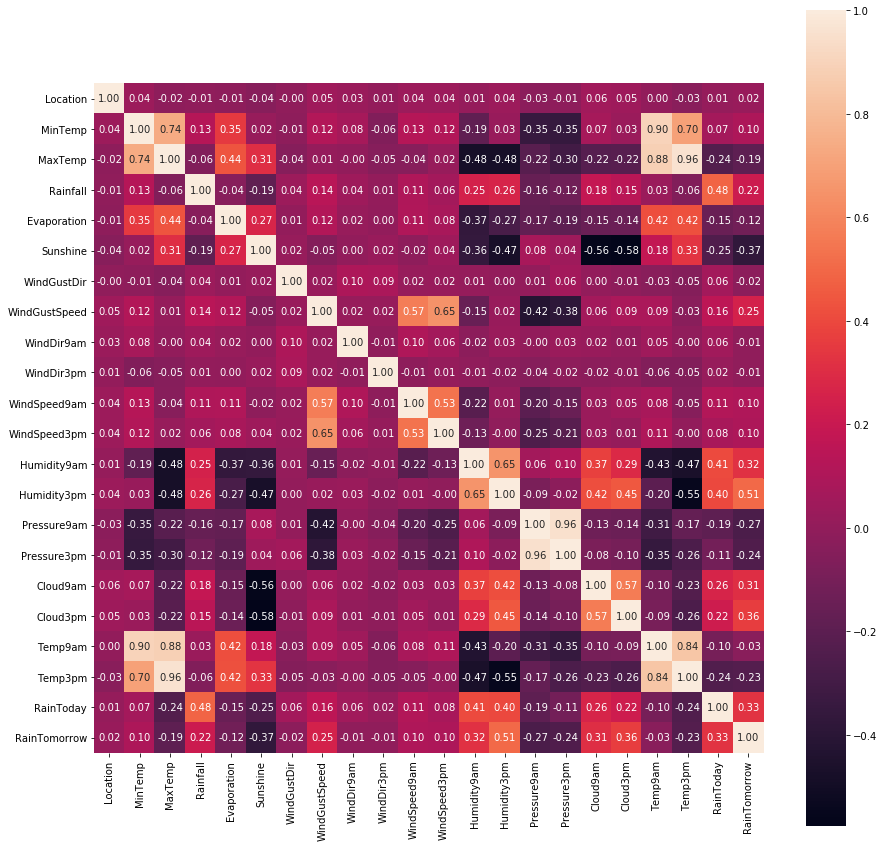

In [84]:
plt.figure(figsize=(15,15))
sns.heatmap(underSampledEnc.corr(), square=True, annot=True, fmt=".2f")
plt.show()

In [93]:
featureNames = ["Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"]

features = underSampledEnc[featureNames]
target = underSampledEnc["RainTomorrow"]

In [94]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [95]:
Xtrain = StandardScaler(Xtrain)
Xtest = StandardScaler(Xtest)

In [96]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [97]:
rf = output["output_model"]

In [98]:
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [99]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

Accuracy: 0.7916300665077174
ROC AUC: 0.791610124182664
Cohen's Kappa: 0.5832393425489577
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      8002
           1       0.79      0.79      0.79      7936

    accuracy                           0.79     15938
   macro avg       0.79      0.79      0.79     15938
weighted avg       0.79      0.79      0.79     15938



/home/art3mis/anaconda3/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:564: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w_mat = np.ones([n_classes, n_classes], dtype=np.int)


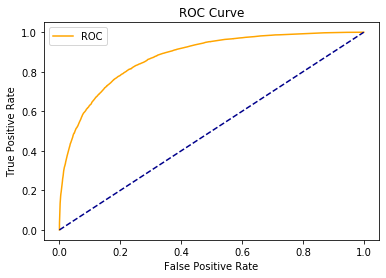

In [100]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)